In [141]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
%autoreload 2

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
n = 100
p = 3
d = 4

In [41]:
Y = np.random.randn(100, p*d)
U = np.vstack([np.eye(d), np.zeros((d*(p-1), d))])
A = np.random.randn(p*d, d)

In [15]:
yua = Y @ (U - A)


In [16]:
omega = yua.T @ yua

In [17]:
omega

array([[ 547.27961267,  107.06572309,  -30.29688541, -157.19627782],
       [ 107.06572309,  861.10751614,  131.7436413 , -408.36970491],
       [ -30.29688541,  131.7436413 ,  645.64698351, -456.84238439],
       [-157.19627782, -408.36970491, -456.84238439, 1399.94609188]])

In [20]:
X = Y[:, :d]

In [21]:
X.shape

(100, 4)

In [19]:
np.dot(Y[0], A[:, 0])

4.912800332092723

In [23]:
sum((X[0] - np.dot(Y[0], A[:, 0]))**2)

111.37849290928726

In [29]:
np.sum((X - np.dot(Y, A))**2, axis=0)

array([ 547.27961267,  861.10751614,  645.64698351, 1399.94609188])

In [31]:
np.diag(np.diag(omega))

array([[ 547.27961267,    0.        ,    0.        ,    0.        ],
       [   0.        ,  861.10751614,    0.        ,    0.        ],
       [   0.        ,    0.        ,  645.64698351,    0.        ],
       [   0.        ,    0.        ,    0.        , 1399.94609188]])

In [1]:
from generate_data import SyntheticDataset

In [47]:
SyntheticDataset(1000, 20, 3, B_scale=1.0, graph_type='ER', degree=4).B

(20, 20)

In [64]:
dag = SyntheticDataset.simulate_random_dag(20, 1.0, 'ER', np.random.RandomState(1))

In [66]:
dag_obj = SyntheticDataset(1000, 20, 3, B_scale=1.0, graph_type='ER', degree=4)

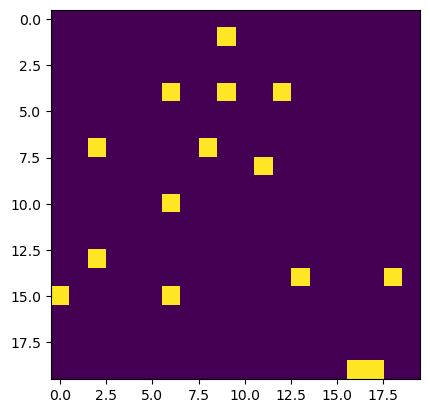

In [65]:
plt.imshow(dag)

In [61]:
Agr = np.random.choice([0, 1], (20, 20), p=[0.9, 0.1])

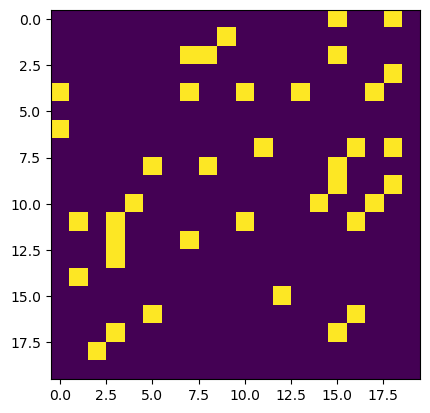

In [62]:
plt.imshow(Agr)

In [69]:
A_weighted = dag_obj.simulate_weight(Agr, dag_obj.B_ranges)

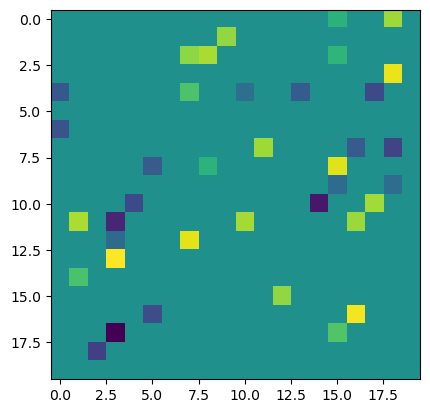

In [70]:
plt.imshow(A_weighted)

In [39]:
dag_obj = SyntheticDataset(100, 20, 3, B_scale=1.0, graph_type='ER', degree=4)

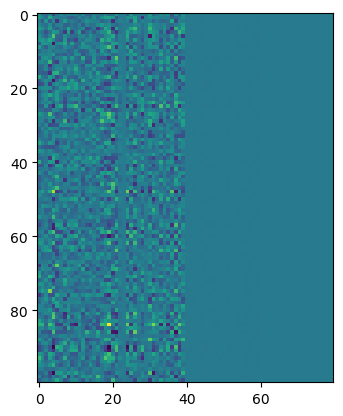

In [40]:
plt.imshow(dag_obj.Y)

In [43]:
dag_obj.Y[:, :40]

array([[ 1.25122764, -0.25510068, -0.69387618, ...,  1.17560485,
        -1.01743574,  1.11578773],
       [ 1.67844688,  0.48945001, -0.52363219, ..., -0.61875452,
        -0.15054433,  0.81306297],
       [-0.01030102, -1.27945499,  1.24731469, ..., -1.8948671 ,
         0.46811644,  0.14869739],
       ...,
       [-0.90281635, -0.81668961,  0.25473451, ...,  0.22113765,
        -1.3985035 ,  2.49100614],
       [ 0.46335339, -1.21142369, -0.66265513, ..., -3.09847692,
         0.46353309, -0.38737852],
       [-1.5489854 , -0.18879306,  0.31585775, ...,  0.86246833,
        -1.05190981, -2.02356629]])

In [42]:
dag_obj.Y[:, 40:]

array([[ 6.79037029e-03, -1.26799699e-02,  1.08214289e-02, ...,
        -3.14058959e-04, -8.93991091e-06, -2.20464278e-04],
       [-5.02255251e-03,  9.06269499e-03,  7.88546325e-03, ...,
         1.09671773e-04,  9.63980276e-07, -3.65919387e-04],
       [ 9.39625446e-03,  1.98666861e-02,  1.44213650e-03, ...,
         2.32906621e-04, -1.17829193e-04,  2.41631800e-04],
       ...,
       [ 3.73408527e-02, -1.15468601e-02,  2.41589374e-02, ...,
        -4.84596010e-04,  6.57896380e-05,  1.19274076e-04],
       [ 4.08735032e-03,  3.51006627e-02, -3.75697725e-03, ...,
         3.87709020e-04, -2.92067774e-05,  5.60293266e-04],
       [-8.11695670e-03, -1.20872208e-02, -1.96254881e-02, ...,
        -1.31226786e-04,  1.01273359e-04,  1.56484946e-04]])

In [33]:
dag_obj.A.shape

(80, 20)

In [34]:
dag_obj.Y.shape

(1000, 80)

In [125]:
X = dag_obj.Y[:, :20]

In [126]:
X.shape

(1000, 20)

In [127]:
ya = dag_obj.Y @ dag_obj.A

In [128]:
X - ya

array([[ 0.63607818, -0.71831966,  0.54140666, ..., -0.10939976,
         0.26265005, -1.19908123],
       [ 1.0657144 , -0.44314814,  2.10813192, ...,  1.43284261,
         0.63762381, -1.37304542],
       [ 0.71167312, -0.37788095,  1.6884842 , ...,  0.90432895,
         2.69002712, -1.40670132],
       ...,
       [ 0.42273825, -2.07631473, -0.14471028, ..., -0.70752807,
        -0.60143071,  1.24300849],
       [-0.61926274, -1.59834052, -0.71460924, ...,  0.2573599 ,
        -0.97295073, -0.82520457],
       [-1.28899776,  0.45239361, -0.28536544, ...,  0.28830151,
         1.35627647,  1.77010341]])

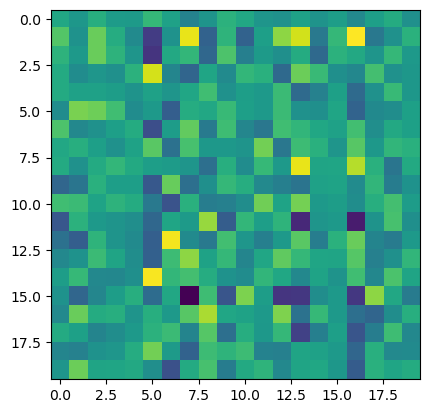

In [129]:
plt.imshow(X[:20])

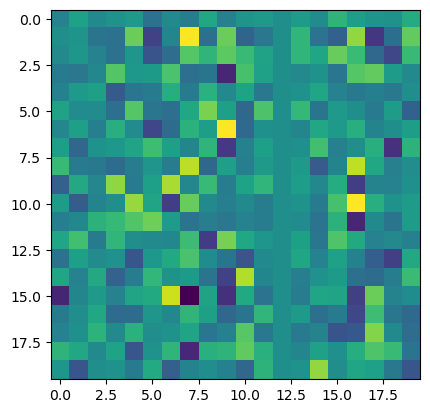

In [130]:
plt.imshow(ya[:20])

In [131]:
ya + dag_obj.Z

array([[ 0.25884891, -0.18706631,  0.4183066 , ...,  0.0524844 ,
         0.35264609, -0.33994285],
       [ 1.06946304, -0.29832263,  1.3166436 , ..., -0.97128967,
        -0.31925155,  0.49981402],
       [ 0.5408536 , -0.13608824,  1.30903632, ..., -0.22326409,
         0.66877065, -0.10150143],
       ...,
       [ 0.51723236, -1.12663592, -0.16202764, ...,  0.20244977,
        -0.02532765, -0.60028007],
       [-0.9672922 , -0.89141631, -0.19340441, ...,  0.85957822,
        -0.15999445, -1.03885665],
       [-0.43036657,  0.20937063, -0.20227716, ..., -1.08788947,
         0.21533625,  0.55641469]])

In [132]:
dag_obj.X

array([[ 0.25884891, -0.18706631,  0.4183066 , ...,  0.0524844 ,
         0.35264609, -0.33994285],
       [ 1.06946304, -0.29832263,  1.3166436 , ..., -0.97128967,
        -0.31925155,  0.49981402],
       [ 0.5408536 , -0.13608824,  1.30903632, ..., -0.22326409,
         0.66877065, -0.10150143],
       ...,
       [ 0.51723236, -1.12663592, -0.16202764, ...,  0.20244977,
        -0.02532765, -0.60028007],
       [-0.9672922 , -0.89141631, -0.19340441, ...,  0.85957822,
        -0.15999445, -1.03885665],
       [-0.43036657,  0.20937063, -0.20227716, ..., -1.08788947,
         0.21533625,  0.55641469]])

In [134]:
np.mean(dag_obj.X, axis=0)

array([ 0.0037074 , -0.03470875,  0.00148079, -0.003235  , -0.00847463,
       -0.04186581,  0.04924077, -0.02083693,  0.00561222, -0.01031412,
        0.00845566, -0.01746424,  0.02126485, -0.02488406, -0.01117705,
        0.00264126, -0.00870244,  0.00354643,  0.00380279, -0.00375492])

In [1]:
from model import GolemTS
from generate_data import SyntheticDataset
import numpy as np


In [2]:
import torch

In [22]:
A_init = np.random.randn(20, 5)
dag_obj = SyntheticDataset(1000, 5, 3, B_scale=1.0, graph_type='ER', degree=4)
model = GolemTS(n=1000, d=5, p=3, Y=dag_obj.Y, lambda_1=0.0, lambda_2=0.0, A_init=A_init)

In [23]:
import trainer

In [24]:
trainer.train(model, dag_obj.Y, epochs=1000)

tensor(-125.8777, grad_fn=<AddBackward0>)
tensor(-125.8777, grad_fn=<MulBackward0>)
tensor(592.0764, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<AddBackward0>)
tensor(nan, grad_fn=<MulBackward0>)
tensor(718.9775, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<AddBackward0>)
tensor(nan, grad_fn=<MulBackward0>)
tensor(879.8771, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<AddBackward0>)
tensor(nan, grad_fn=<MulBackward0>)
tensor(953.5291, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<AddBackward0>)
tensor(nan, grad_fn=<MulBackward0>)
tensor(967.8713, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<AddBackward0>)
tensor(nan, grad_fn=<MulBackward0>)
tensor(949.4634, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<AddBackward0>)
tensor(nan, grad_fn=<MulBackward0>)
tensor(932.2145, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<AddBackward0>)
tensor(nan, grad_fn=<MulBackward0>)
tensor(932.5903, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<AddBackward0>)
tensor(nan, grad_fn=<MulBackward0>)
tensor(1098.

In [25]:
A_init

array([[-1.12016721e+00, -1.33455207e+00,  9.31025946e-01,
        -4.96300773e-01, -5.89419795e-01],
       [ 1.04206586e+00,  1.10245802e+00,  1.81851615e+00,
         1.75983710e+00,  1.74679230e-01],
       [-9.44467161e-01, -9.21457239e-01, -1.61979621e+00,
         1.63595033e+00,  4.15802894e-01],
       [ 1.45089847e+00, -3.47150891e-01,  1.63889130e+00,
         1.00302095e+00,  1.67494771e+00],
       [ 1.10308861e+00, -2.83077781e+00,  8.93592636e-01,
        -2.88073680e-01, -4.64719939e-01],
       [-2.52948100e-01,  6.54412814e-01, -1.17127395e+00,
        -7.54755298e-01,  4.49522079e-02],
       [-1.30748590e+00, -2.86321930e-01, -3.01274200e-02,
         6.16575000e-01, -5.39770080e-01],
       [ 2.65959442e-01,  1.06998640e+00, -1.16404408e+00,
         1.34309901e+00,  9.96014477e-01],
       [-5.45916928e-01, -9.81855628e-01,  8.08093945e-01,
        -2.27612241e+00,  4.40154341e-01],
       [ 1.64728892e-01, -3.10583849e-01,  9.96782649e-02,
         1.61086800e+00

In [28]:
dag_obj.A.shape

(20, 5)

In [29]:
model.A.shape

torch.Size([20, 5])

In [9]:
def _compute_likelihood(Y, A):

    Binv = model.U - A
    B = torch.pinverse(Binv)
        # print(self.A)
        # print(Binv)
        # print(self.Y @ Binv)
    omega = torch.diag(torch.diag((Y @ Binv).T @ (Y @ Binv))) / 1000
    print(omega)
        # print((self.Y @ Binv).T @ (self.Y @ Binv))
    print(torch.det(B.T @ omega @ B))
    print(B.T @ omega @ B)
    print(np.linalg.eig((B.T @ omega @ B).detach().numpy())[0])
    return 0.5 * torch.logdet(B.T @ omega @ B)

In [30]:
_compute_likelihood(torch.tensor(dag_obj.Y, dtype=torch.float32), torch.tensor(dag_obj.A, dtype=torch.float32))




tensor([[1.4335, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.8797, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.2795, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.1491, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.4564]])
tensor(-0.)
tensor([[ 8.6805e-01,  1.0524e+00, -6.4645e-01,  9.1205e-01,  1.9298e-01,
          2.9694e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00, -3.3484e-04,  0.0000e+00,  2.6149e-04,  0.0000e+00,
         -1.4682e-06,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.0524e+00,  1.8256e+00, -1.4396e+00,  2.2702e+00,  4.9488e-01,
         -1.8139e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00, -8.3347e-04,  0.0000e+00,  1.0037e-03,  0.0000e+00,
         -4.5836e-06,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-6.4645e-01, -1.4396e+00,  1.9051e+00, -3.1863e+00, -8.0574e-01,
          4.2356e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e

tensor(-inf)

In [31]:
_compute_likelihood(torch.tensor(dag_obj.Y, dtype=torch.float32), model.A)


tensor([[ 73.7022,   0.0000,   0.0000,   0.0000,   0.0000],
        [  0.0000,  16.8019,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000, 220.5424,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   2.0102,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000,   0.8720]],
       grad_fn=<DivBackward0>)
tensor(-0., grad_fn=<LinalgDetBackward0>)
tensor([[ 1.1304e+00,  8.8353e-01, -1.5081e+00,  1.2405e+00, -1.0563e+00,
         -1.5370e+00, -8.3895e-02, -9.3028e-01, -2.3388e-01, -8.4222e-02,
          8.8063e-01,  3.9595e-01, -1.7628e+00,  1.2131e-01,  1.0661e-01,
          6.7263e-01,  9.7405e-01,  2.5982e-02,  1.5525e-02,  1.3029e+00],
        [ 8.8353e-01,  1.4316e+00, -1.9322e+00,  1.8736e+00, -3.1826e-01,
         -1.6793e+00, -4.1788e-01, -7.8116e-01, -3.5803e-01,  2.7303e-02,
          1.1573e+00,  2.9767e-01, -1.0469e+00,  3.9312e-01, -1.3363e-01,
          1.2174e-01,  9.0534e-01,  3.7083e-01, -1.8135e-01,  1.0285e+00],
        [-1.5081e+00, -1.9322e+0

tensor(nan, grad_fn=<MulBackward0>)

In [20]:
model.A

Parameter containing:
tensor([[-6.7983e-04,  4.7921e-01, -2.6376e-01,  ..., -4.9392e-01,
         -1.9254e+00, -4.7832e-04],
        [-1.3927e-03,  7.5130e-04, -7.2145e-01,  ...,  1.6937e+00,
          1.1800e+00,  9.8079e-03],
        [ 1.5770e+00,  3.2433e-01,  1.9912e-04,  ..., -2.5342e+00,
         -5.4728e-01,  7.4730e-01],
        ...,
        [-5.0863e-01,  1.5533e+00, -9.3559e-01,  ..., -4.8247e-01,
          1.9320e-01, -1.5155e-01],
        [ 1.5120e-01,  3.7256e-01,  3.1464e-01,  ..., -2.8972e-01,
          9.3236e-02,  1.7088e+00],
        [ 6.5742e-01,  8.2346e-02,  1.6055e-01,  ...,  4.0668e-01,
         -5.9718e-01,  2.0148e+00]], requires_grad=True)

In [25]:
model.A.detach().numpy()  - dag_obj.A

array([[-6.79826306e-04,  4.79212493e-01, -2.63758361e-01, ...,
        -4.93924856e-01, -1.92541766e+00, -4.78318747e-04],
       [-1.39268942e-03,  7.51298910e-04, -7.21449792e-01, ...,
         1.69374144e+00, -5.51100727e-01,  9.80791729e-03],
       [ 1.57697403e+00,  3.24333429e-01,  1.99115428e-04, ...,
        -2.53417015e+00,  3.78803345e-01, -1.05911934e+00],
       ...,
       [-5.08634031e-01,  1.55329883e+00, -9.35586751e-01, ...,
        -4.82470393e-01,  1.93203062e-01, -1.51545763e-01],
       [ 1.51200384e-01,  3.72558057e-01,  3.14641416e-01, ...,
        -2.89724261e-01,  9.32363272e-02,  1.70876610e+00],
       [ 6.57421172e-01,  8.23455229e-02,  1.60553500e-01, ...,
         4.06680346e-01, -5.97177625e-01,  2.01480770e+00]])

In [23]:
model.A.detach().numpy()

array([[-6.7982631e-04,  4.7921249e-01, -2.6375836e-01, ...,
        -4.9392486e-01, -1.9254177e+00, -4.7831875e-04],
       [-1.3926894e-03,  7.5129891e-04, -7.2144979e-01, ...,
         1.6937414e+00,  1.1800190e+00,  9.8079173e-03],
       [ 1.5769740e+00,  3.2433343e-01,  1.9911543e-04, ...,
        -2.5341702e+00, -5.4727811e-01,  7.4729908e-01],
       ...,
       [-5.0863403e-01,  1.5532988e+00, -9.3558675e-01, ...,
        -4.8247039e-01,  1.9320306e-01, -1.5154576e-01],
       [ 1.5120038e-01,  3.7255806e-01,  3.1464142e-01, ...,
        -2.8972426e-01,  9.3236327e-02,  1.7087661e+00],
       [ 6.5742117e-01,  8.2345523e-02,  1.6055350e-01, ...,
         4.0668035e-01, -5.9717762e-01,  2.0148077e+00]], dtype=float32)